**Supervised - Salary Prediction - Regression**

In [ ]:
# import all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### import dataset

In [ ]:
# read the dataset using pandas
data = pd.read_csv('Salary_Data.xls')

In [ ]:
# This displays the top 7 rows of the data
data.head(30)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### Exploratory Data Analysis

In [ ]:
# Provides some information regarding the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
# this describes the basic stat behind the dataset used
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

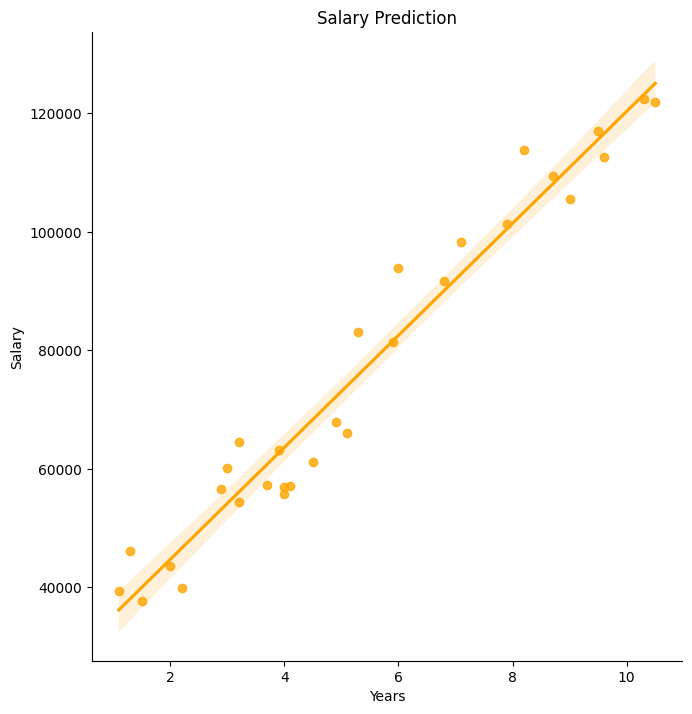

In [ ]:
# These Plots help to explain the values and how they are scattered

plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=['YearsExperience'],y_vars=['Salary'],size=7,kind='reg', plot_kws={'color': 'orange'})
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.show()

### Feature Engineering
1. Check Duplicated Data
2. Check Missing Value Handling
3. Outlier Analysis
4. Encoding categorical : change string (categorical) into numerical -> in this dataset, there are no categorical data.

### Investigate of Feature Engineering

In [ ]:
df = data.copy()

In [ ]:
#Check Duplicated Data
print("Data Sebelum Pemeriksaan Duplikat:")
print(df.shape)

Data Sebelum Pemeriksaan Duplikat:
(30, 2)


In [ ]:
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before

,YearsExperience,Salary


In [ ]:
df = df.drop_duplicates()

In [ ]:
print("\nData Setelah Pemeriksaan Duplikat:")
print(df.shape)


Data Setelah Pemeriksaan Duplikat:
(30, 2)


In [ ]:
#Check missing value
df.isna().sum()

,0
YearsExperience,0
Salary,0


### There is no missing value

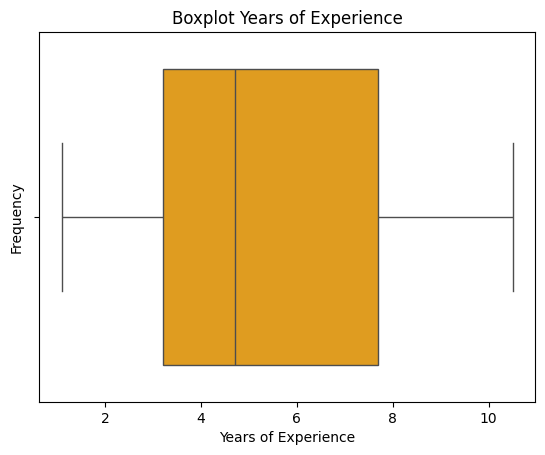

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier Analysis
sns.boxplot(x="YearsExperience", data=df, color='orange')

# Menambahkan label sumbu dan judul
plt.xlabel("Years of Experience")
plt.ylabel("Frequency")  # Anda bisa menggunakan "Years of Experience" atau "Tahun Pengalaman"
plt.title("Boxplot Years of Experience")

# Menampilkan plot
plt.show()

### There's no outlier value
### There are no problems in investigate Feature Engineering, next we are doing machine learning modelling and splitting data into X_train, X_test -> Predictor, y_train, y_test -> target variables. If there are problems in investigate feature engineering then doing splitting data and process feature engineering handling.

### Splitting the data

In [ ]:
# Experience of Years data
X = data['YearsExperience']
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [ ]:
# Salary data
y = data['Salary']
y.head()

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


In [ ]:
# Import machine learning data from scikit learn
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data for train and test
# train : test = 75 : 25 atau 80 : 20 atau 70:30 atau 85:15
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=42)

**Linear Regression**

In [ ]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [ ]:
# Create new axis for x column in array
import numpy as np
# Convert X_train and X_test to NumPy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Add new axis to the end
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [ ]:
#array
X_train

array([[ 4. ],
       [ 1.1],
       [ 2.2],
       [ 5.1],
       [ 2.9],
       [ 4.1],
       [ 4. ],
       [ 7.9],
       [ 1.3],
       [ 1.5],
       [ 9. ],
       [ 2. ],
       [ 7.1],
       [ 9.5],
       [ 5.9],
       [10.5],
       [ 6.8],
       [ 3.2],
       [ 3.9],
       [ 4.5],
       [ 6. ],
       [ 3. ]])

In [ ]:
#array
X_test

array([[ 9.6],
       [ 4.9],
       [ 8.2],
       [ 5.3],
       [ 3.2],
       [ 3.7],
       [10.3],
       [ 8.7]])

In [ ]:
y_train

,Salary
12,56957.0
0,39343.0
4,39891.0
16,66029.0
5,56642.0
13,57081.0
11,55794.0
22,101302.0
1,46205.0
2,37731.0


In [ ]:
# Fitting the model using Linear Regression
lr_model = LinearRegression() # Mahasiswa A
lr_model.fit(X_train,y_train) # Belajar

LinearRegression()

In [ ]:
# Predicting the Salary for the Test values
y_pred = lr_model.predict(X_test) # UTS ataupun UAS

In [ ]:
X_test

array([[ 9.6],
       [ 4.9],
       [ 8.2],
       [ 5.3],
       [ 3.2],
       [ 3.7],
       [10.3],
       [ 8.7]])

In [ ]:
y_pred

array([115439.88180109,  71396.10622651, 102320.45928951,  75144.51265839,
        55465.37889103,  60150.88693088, 121999.59305688, 107005.96732936])

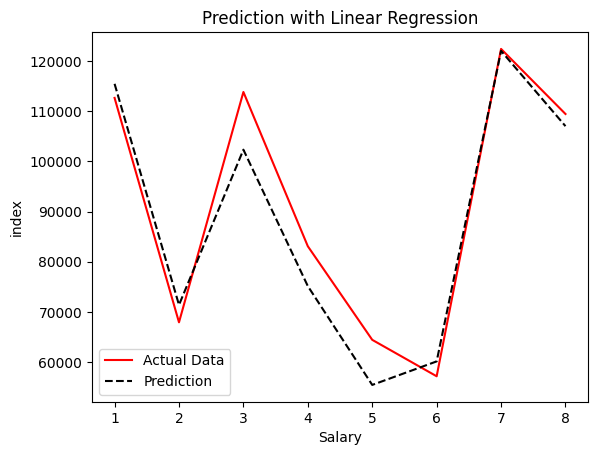

In [ ]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='red',linestyle='-',label='Actual Data')
plt.plot(c,y_pred,color='black',linestyle='dashed',label='Prediction')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

In [ ]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
# Calculate R square vale
rsq = r2_score(y_test,y_pred)

In [ ]:
print('r square Linear Regression:',rsq)

r square Linear Regression: 0.9347210011126782


In [ ]:
# Intecept and coeff of the line
print('Intercept of the Linear Regression model:',lr_model.intercept_)
print('Coefficient of the line Linear Regression:',lr_model.coef_)

Intercept of the Linear Regression model: 25478.12743600038
Coefficient of the line Linear Regression: [9371.0160797]


![](http://)Then it is said to form a line with result in Linear Regression
# y = 25478.12 + 9731.016 x
with x is the value of year experience work

**Decision Tree Regressor**
Using another Machine Learning Model :
1. Decision Tree
2. Random Forest

In [ ]:
from sklearn.tree import DecisionTreeRegressor # mahasiswa B

In [ ]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Predicting the Salary for the Test values
y_pred_dt = dt_model.predict(X_test) # soal uts maupun uas

In [ ]:
y_pred_dt

array([116969.,  66029., 101302.,  66029.,  54445.,  63218., 121872.,
       105582.])

In [ ]:
y_test

,Salary
27,112635.0
15,67938.0
23,113812.0
17,83088.0
8,64445.0
9,57189.0
28,122391.0
24,109431.0


In [ ]:
X_test

array([[ 9.6],
       [ 4.9],
       [ 8.2],
       [ 5.3],
       [ 3.2],
       [ 3.7],
       [10.3],
       [ 8.7]])

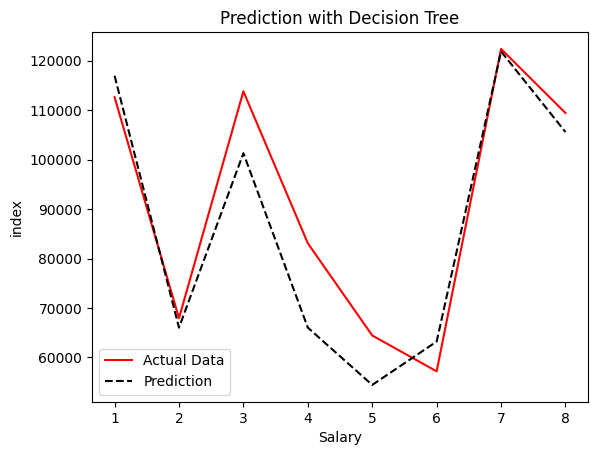

In [ ]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='red',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='black',linestyle='dashed',label='Prediction')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

In [ ]:
# Calculate R square vale
rsq_dt = r2_score(y_test,y_pred_dt)

In [ ]:
print('r square Decision Tree Results:',rsq_dt)

r square Decision Tree Results: 0.8693307583517671


### Using Random Forest

In [ ]:
#import Library RandomForestRegressor model from
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Fitting the model using RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred_rf = model_rf.predict(X_test)

In [ ]:
y_pred_rf

array([113656.26      ,  64279.725     , 102146.79      ,  70546.33      ,
        55831.2       ,  61069.14533333, 118500.63      , 106186.91      ])

In [ ]:
y_test

,Salary
27,112635.0
15,67938.0
23,113812.0
17,83088.0
8,64445.0
9,57189.0
28,122391.0
24,109431.0


In [ ]:
y_test

,Salary
27,112635.0
15,67938.0
23,113812.0
17,83088.0
8,64445.0
9,57189.0
28,122391.0
24,109431.0


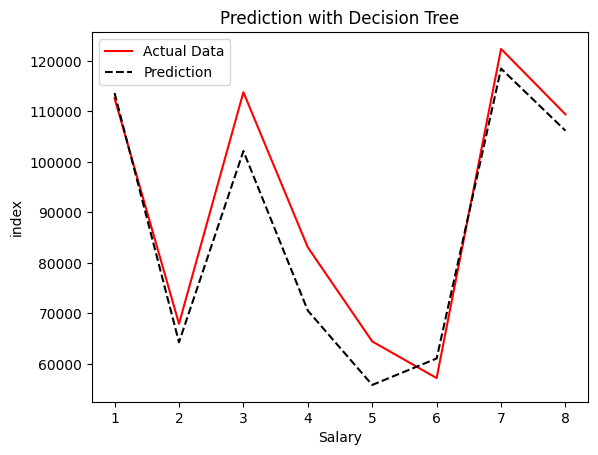

In [ ]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='red',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_rf,color='black',linestyle='dashed',label='Prediction')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

In [ ]:
# Calculate R square vale
rsq_rf = r2_score(y_test,y_pred_rf)
print('r square Decision Tree Results:',rsq_rf)

r square Decision Tree Results: 0.9111077256763833


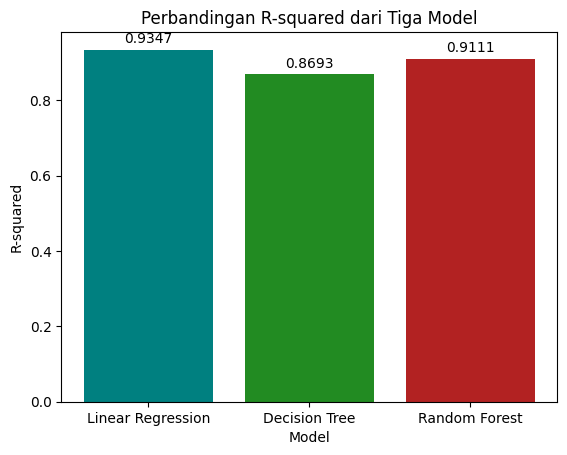

In [ ]:
# R-squared value of each model
r_squared = [rsq, rsq_dt, rsq_rf]
models = ['Linear Regression', 'Decision Tree', 'Random Forest']

# Changet bar chart
plt.bar(models, r_squared, color=['teal', 'forestgreen', 'firebrick'])

plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('Perbandingan R-squared dari Tiga Model')

# Displays the R-squared value above each bar
for i, v in enumerate(r_squared):
    plt.text(i, v + 0.01, str(round(v, 4)), ha='center', va='bottom')

plt.show()

you can doing modelling using RandomForest Regressor with the same flow like Decision Tree or LinearRegression above :)

# **Prediction Linear Regression**

In [ ]:
# Displays prediction results
print("Hasil Prediksi:")
for i in range(len(X_test)):
    print(f"YearsExperience: {X_test[i][0]}, Prediksi Salary: {y_pred[i]}")

Hasil Prediksi:
YearsExperience: 9.6, Prediksi Salary: 115439.88180108776
YearsExperience: 4.9, Prediksi Salary: 71396.10622651373
YearsExperience: 8.2, Prediksi Salary: 102320.45928951251
YearsExperience: 5.3, Prediksi Salary: 75144.51265839237
YearsExperience: 3.2, Prediksi Salary: 55465.378891029504
YearsExperience: 3.7, Prediksi Salary: 60150.88693087781
YearsExperience: 10.3, Prediksi Salary: 121999.59305687537
YearsExperience: 8.7, Prediksi Salary: 107005.9673293608


In [ ]:
data_new_YearsExperience = 10.5
# change input to Array
data_new_YearsExperience = np.array([[data_new_YearsExperience]])

# Conducting New Data Predictions
predicted_salary = lr_model.predict(data_new_YearsExperience)
print(f"Prediksi Salary untuk YearsExperience {data_new_YearsExperience[0][0]} tahun: {predicted_salary[0]}")

Prediksi Salary untuk YearsExperience 10.5 tahun: 123873.79627281468
